## Tutorial: **Graphs and Trees**

We'll use adjacency list, adjacency matrix, and edge list representations to explore fundamental graph and tree concepts. 

#### **Adjacency Lists** : A dictionary (or list of lists) where each key (node) maps to a list of its neighbors.

In [27]:
# Adjacencey Lists
g1 = {
    "Hazratganj":  ["Chinhat","Charbagh","Matyari"],
    "Chinhat":  ["Hazratganj","SRMCEM"],
    "Charbagh": ["Hazratganj"],
    "Matyari" :  ["SRMCEM","Hazratganj"],
    "SRMCEM": ["Chinhat","Matyari"]
}


#### **Adjacency Matrix** : A 2D matrix where matrix[i][j] = 1 if there's an edge from i to j, else 0.

In [28]:

# adjacency Matrix

nodes = ["Hazratganj","Chinhat","Charbagh","Matyari","SRMCEM"]
g2 = [
    [0,1,1,1,0],
    [1,0,0,0,1],
    [1,0,0,0,0],
    [1,0,0,0,1],
    [0,1,0,1,0]
]

#### **Edge Lists** : A list of all edges as pairs of connected vertices (tuples), ideal for simple storage and iteration..


In [ ]:
#edge lists
g3 = [("Hazratganj","Chinhat"),("Chinhat","Hazratganj"),("Hazratganj","Charbagh"),("Charbagh","Hazratganj"),("Hazratganj","Matyari"),("Matyari","Hazratganj"),("Chinhat","SRMCEM"),("Matyari","SRMCEM"),("SRMCEM","Chinhat"),("SRMCEM","Matyari")]

### Note : **Ignore** the below cell it is just for visualization. Just run it!

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
def visualize_graph(graph, title="Graph Visualization", node_color='lightblue', edge_color='gray'):
    """
    Visualize a graph using networkx and matplotlib.
    
    Parameters:
        graph: Graph in adjacency list format (dict)
        title: Title for the visualization
        node_color: Color for nodes
        edge_color: Color for edges
    """
    G = nx.Graph()
    
    # Add nodes and edges
    for node, neighbors in graph.items():
        G.add_node(node)
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    
    # Set up the plot
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)  # positions for all nodes
    
    # Draw the graph
    nx.draw(G, pos, 
            with_labels=True, 
            node_color=node_color, 
            edge_color=edge_color,
            node_size=2000, 
            font_size=16, 
            font_weight='bold')
    
    plt.title(title, fontsize=20)
    plt.show()

def visualize_tree(tree, title="Tree Visualization", root=None):
    """
    Visualize a tree using networkx and matplotlib.
    
    Parameters:
        tree: Tree in adjacency list format (dict)
        title: Title for the visualization
        root: Root node of the tree (if None, first node is used)
    """
    G = nx.DiGraph()
    
    # Add nodes and edges
    for node, children in tree.items():
        G.add_node(node)
        for child in children:
            G.add_edge(node, child)
    
    # Set up the plot
    plt.figure(figsize=(10, 8))
    
    # Use hierarchical layout for trees
    if root is None:
        root = next(iter(tree))
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
    
    # Draw the tree
    nx.draw(G, pos, 
            with_labels=True, 
            node_color='lightgreen', 
            edge_color='gray',
            node_size=2000, 
            font_size=16, 
            font_weight='bold',
            arrows=True)
    
    plt.title(title, fontsize=20)
    plt.show()

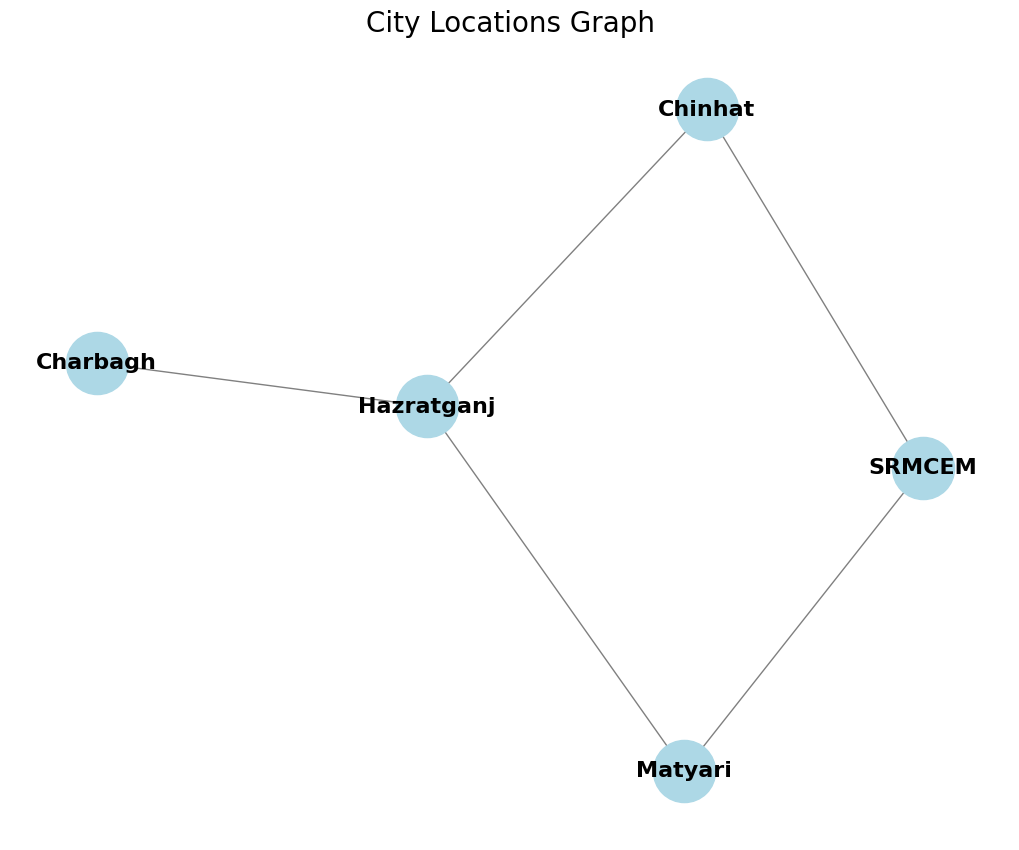

In [30]:
# Basic visualization of the city locations graph
visualize_graph(g1, title="City Locations Graph")



#### 1.  🔍 **findDegrees()** – Get Degree of Each Vertex, Store in Dictionary, and Sort the Dictionary

In [32]:
def findDegrees(graph, nodes=None):
    dict1 = {}

    if isinstance(graph, dict):  # Adjacency List
        for node, item in graph.items():
            dict1[node] = len(item)

    elif isinstance(graph, list) and nodes is None:  # Edge List
        for tup in graph:
            if tup[0] in dict1:
                dict1[tup[0]] +=1

            else:
                dict1[tup[0]] = 1

    else:  # Adjacency Matrix
        for i in range(len(graph)):
            dict1[nodes[i]] = sum(graph[i])


    dict1 = dict(sorted(dict1.items(), key=lambda x: x[1]))

    return dict1

print(findDegrees(g1))
print(findDegrees(g2,nodes))
print(findDegrees(g3))


{'Charbagh': 1, 'Chinhat': 2, 'Matyari': 2, 'SRMCEM': 2, 'Hazratganj': 3}
{'Charbagh': 1, 'Chinhat': 2, 'Matyari': 2, 'SRMCEM': 2, 'Hazratganj': 3}
{'Charbagh': 1, 'Chinhat': 2, 'Matyari': 2, 'SRMCEM': 2, 'Hazratganj': 3}


####  2. **🔁 inter-convert()** – Convert Between Graph Representations

In [45]:

def inter_convert(graph,node=None):
    if isinstance(graph,dict): # adjacency Lists
        l1 = []
        l2 = []
        for node,item in graph.items():
            r = []
            for node in graph.keys():
                r.append(1 if node in item else 0)
            l1.append(r)

        for node,item in graph.items():
            for n in item:
                l2.append((node,n))
        return l1,l2

    elif isinstance(graph,list) and node is None:  # edge list
        dict1 = {}
        for tup in graph:
            if tup[0] in dict1:
                dict1[tup[0]].append(tup[1])
            else:
                dict1[tup[0]] = [tup[1]]

        l1 = [] 

        for node,item in dict1.items():
            r = []
            for node in dict1.keys():
                r.append(1 if node in item else 0)
            l1.append(r)
            
        return dict1,l1
        
    else:                       # adjacency matrix

        dict1 = {}

        for i in range(len(graph)):
            for j in range(len(graph[i])):
                if graph[i][j] ==1:
                    if node[i] in dict1:
                        dict1[node[i]].append(node[j])
                    else:
                        dict1[node[i]] = [node[j]]

        l1 = []

        for node,item in dict1.items():
            for n in item:
                l1.append((node,n))
        

        return dict1,l1


inter_convert(g2,nodes)
                


({'Hazratganj': ['Chinhat', 'Charbagh', 'Matyari'],
  'Chinhat': ['Hazratganj', 'SRMCEM'],
  'Charbagh': ['Hazratganj'],
  'Matyari': ['Hazratganj', 'SRMCEM'],
  'SRMCEM': ['Chinhat', 'Matyari']},
 [('Hazratganj', 'Chinhat'),
  ('Hazratganj', 'Charbagh'),
  ('Hazratganj', 'Matyari'),
  ('Chinhat', 'Hazratganj'),
  ('Chinhat', 'SRMCEM'),
  ('Charbagh', 'Hazratganj'),
  ('Matyari', 'Hazratganj'),
  ('Matyari', 'SRMCEM'),
  ('SRMCEM', 'Chinhat'),
  ('SRMCEM', 'Matyari')])

---


#### 3. **check_adjacency()** – Check if Two Vertices Are Adjacent


In [46]:
# Given two vertices check if they are adjacent

def check_adjacency(graph,v1,v2):
    if v2 in graph[v1]:
        return True
    else:
        return False
    
print(check_adjacency(g1,"Hazratganj","SRMCEM"))
print(check_adjacency(g1,"Hazratganj","Matyari"))



False
True


#### 4. **is_complete()** – Check if a Graph is Complete

Complete Graph - A graph is complete every node of the graph is connected to every other node in graph

*Note : This function will graph as adjacency matrix, but we can obviously interconvert these using inter_convert() function***

In [35]:
def is_complete(graph):
    n = len(graph)

    for i in range(n):
        if sum(graph[i])!=n-1:
            return False
        
    return True

is_complete(g2)


False

#### 5. **is_connected()** – Check if a Graph is Connected

Connected Graph – A graph is connected if there is a path between every pair of vertices in the graph. In other words, all vertices are reachable from any other vertex.

In [36]:
# check if a graph is connected
from collections import deque

def is_connected(graph): 
    nodes_visited = set()

    nodes = [key for key in graph.keys()]

    ran = nodes[len(nodes)//2]
    qu = deque([ran])
    nodes_visited.add(ran)
    
    while qu:
        cur = qu.popleft()

        for neigbour in graph[cur]:
            if neigbour not in nodes_visited:
                nodes_visited.add(neigbour)
                qu.append(neigbour)

    return len(nodes_visited) == len(nodes)

is_connected(g1)


True

#### 6. To Check whether given sequence of vertices is **Walk**, **Trail**, **Path** or None.

Walk – A sequence of vertices where each adjacent pair is connected by an edge (vertices and edges can repeat).

Trail – A walk in which no edge is repeated, but vertices may repeat.

Path – A trail in which no vertex is repeated.

In [37]:
# given a sequenece of vertices check if it is walk, trial, path, NOTA.

def find(seq, graph):  # Assumes the graph is in adjacency list format

    # Check if the sequence forms a valid walk
    def is_walk():
        for i in range(len(seq) - 1):
            if not check_adjacency(graph, seq[i], seq[i + 1]):
                return False
        return True

    # Check if the sequence forms a path (no repeated vertices)
    def is_path():
        if is_walk():
            vertex_visited = set()
            for vertex in seq:
                if vertex in vertex_visited:
                    return False
                vertex_visited.add(vertex)
            return True
        return False

    # Check if the sequence forms a trail (no repeated edges)
    def is_trail():
        if is_walk():
            edges_visited = set()
            for i in range(len(seq) - 1):
                edge = (seq[i], seq[i + 1])
                if edge in edges_visited:
                    return False
                edges_visited.add(edge)
            return True
        return False

    # Determine the type of sequence
    if is_path():
        return "It is a path"
    if is_trail():
        return "It is a trail"
    if is_walk():
        return "It is a walk"
    return "None of these"


        
s1 = ["Charbagh","Hazratganj","Chinhat","SRMCEM","Matyari","Hazratganj","Chinhat","Hazratganj"]
find(s1,g1)

'It is a walk'

#### 7. 🔁 has_cycle() – Detect Cycle in an Undirected Graph

Cycle in Graph – If there exists a path that starts and ends at the same vertex without repeating any edge.



In [38]:
from collections import deque

def has_cycle(graph):
    """
    Checks whether an undirected graph contains a cycle using BFS.

    Parameters:
        graph (dict): An adjacency list representation of the graph.

    Returns:
        bool: True if the graph has a cycle, False otherwise.
    """
    visited = set()

    for vertex in graph:
        if vertex not in visited:
            queue = deque([(vertex, None)])

            while queue:
                current, parent = queue.popleft()
                visited.add(current)

                for neighbor in graph[current]:
                    if neighbor not in visited:
                        queue.append((neighbor, current))
                    elif neighbor != parent:
                        # Found a visited neighbor that is not the parent
                        return True

    return False  # No cycle found


has_cycle(g1)

True

#### 8. 🌳 **is_tree()** – Check If a Graph Is a Tree

Tree – A connected graph with no cycles and exactly (V − 1) edges.

In [39]:
def is_tree(graph):
    V = len(graph)
    edges = sum(len(graph[v]) for v in graph)//2

    if not is_connected(graph):
        return False
    
    if edges!= V-1:
        return False
    
    # if has_cycle(graph,V):return False

    return True

is_tree(g1)

False

#### 9. **spanning_tree()** – Extract a Spanning Tree from a Connected Cyclic Graph

Spanning Tree – A subgraph that includes all the vertices of the original graph with the minimum number of edges and no cycles.


In [43]:
from collections import deque


def directed_spanning_tree(graph):
    """
    Generates a directed spanning tree from a connected directed graph using BFS.

    Parameters:
        graph (dict): Adjacency list of the directed graph.

    Returns:
        dict: Adjacency list of the directed spanning tree.
    """
    
    visited = set()
    tree = {node: [] for node in graph}  # Start empty tree with same nodes
    start_node = next(iter(graph))  # Get any starting node safely
    queue = deque([start_node])
    visited.add(start_node)

    while queue:
        current = queue.popleft()
        
        for neighbor in graph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                tree[current].append(neighbor)
                queue.append(neighbor)

    return tree


t1 = directed_spanning_tree(g1)
print(t1)



{'Hazratganj': ['Chinhat', 'Charbagh', 'Matyari'], 'Chinhat': ['SRMCEM'], 'Charbagh': [], 'Matyari': [], 'SRMCEM': []}


#### 10. **count_leaf_nodes()** – Count the Number of Leaf Nodes in a Tree



Leaf Node – A node in a tree with degree 1 (i.e., connected to only one other node).



In [ ]:
def count_leaf_nodes(tree):
    """
    Counts the number of leaf nodes in a directed tree.
    
    Parameters:
        tree (dict): Adjacency list of the tree.
    
    Returns:
        int: Number of leaf nodes.
    """
    count = 0
    for node, neighbors in tree.items():
        if len(neighbors) == 0:  # A leaf node has no outgoing edges
            count += 1

    return count

# Assuming `g1` is your graph, and `spanning_tree(g1)` gives you the directed spanning tree
t1 = directed_spanning_tree(g1)

# Count leaf nodes in the directed spanning tree
print(count_leaf_nodes(t1))  # Should output the number of leaf nodes



3


### 11. **Check if a Tree is a Binary Tree**

A binary tree is a tree where each node has **at most two children**. The function below checks if a given tree (represented as an adjacency list) is a binary tree.


In [ ]:
def is_binary_tree(tree):
    """
    Checks if a tree is a binary tree.
    
    Parameters:
        tree (dict): Adjacency list of the tree.
    
    Returns:
        bool: True if the tree is a binary tree, False otherwise.
    """
    for node, neighbors in tree.items():
        if len(neighbors) > 2:  # Binary tree node can have at most 2 children
            return False
    return True

# Example tree (directed)
tree = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': [],
    'D': []
}

# Check if it's a binary tree
print(is_binary_tree(tree))  # Output: True


True


#### 12. Given a tree, **find its height**.

The height of a tree is the length of the longest path from the root node to any leaf node.


In [ ]:
def find_height(tree, node, visited=None):
    """
    Finds the height of the tree starting from the given node.

    Parameters:
        tree (dict): Adjacency list of the tree.
        node (str): The current node from which to calculate the height.
        visited (set): A set to keep track of visited nodes.

    Returns:
        The height of the tree from the given node.
    """

    if visited is None:
        visited = set()

    # Mark the current node as visited
    visited.add(node)

    # Initialize the height as 1 (the node itself)
    max_height = 1

    # Traverse all neighbors (children) of the current node
    for neighbor in tree[node]:
        if neighbor not in visited:
            # Find the height of the subtree rooted at the neighbor
            height = find_height(tree, neighbor, visited)
            max_height = max(max_height, height)

    # Return the height of the tree from the current node
    return max_height + 1

# Example tree (directed)
tree = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': [],
    'D': []
}

# Finding the height of the tree
root = 'A'
print(f"The height of the tree is: {find_height(tree, root)}")


The height of the tree is: 4


#### 13. Given a tree, **find its depth**.

The **depth** of a tree is the number of edges from the **root node** to a particular node. The depth of the **root node** is 0, and the depth increases as we move towards the leaf nodes.


In [ ]:
def find_node_depth(tree, target_node, current_node, visited=None, current_depth=0):
    """
    Calculates the depth of a specific node in a tree.

    Parameters:
        tree (dict): The tree represented as an adjacency list.
        target_node (str): The node whose depth we want to calculate.
        current_node (str): The current node being checked.
        visited (set): A set to track visited nodes during traversal.
        current_depth (int): The current depth during traversal.

    Returns:
        int: The depth of the target node if found, else -1.
    """
    if visited is None:
        visited = set()

    # Mark the current node as visited
    visited.add(current_node)

    # If we've reached the target node, return its depth
    if current_node == target_node:
        return current_depth
    
    # Traverse all neighboring nodes (children)
    for neighbor in tree.get(current_node, []):
        if neighbor not in visited:
            depth = find_node_depth(tree, target_node, neighbor, visited, current_depth + 1)
            if depth != -1:
                return depth
    
    # If the node isn't found, return -1
    return -1

# Example of a directed tree
tree_example = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ["F"],
    'D': [],
    "F": []
}

# Finding the depth of node 'F'
target = 'C'
depth_of_node = find_node_depth(tree_example, target, 'A')
print(f"The depth of node {target} is: {depth_of_node}")



The depth of node C is: 1


## ✅ Wrap-Up
You now know how to work with graphs and trees using Python. Keep exploring and coding!